In [68]:
#Install packages
#! pip install --user pandas
! pip install --user pandas-profiling
#! pip install --user seaborn

### “Six-Steps Statistical Investigation”

- research question
- Design a study and collect data
- Explore the data
- Draw inferences
- Formulate conclusions
- Look back and ahead

1- Define question

Quais os 2 distritos com maior impacto florestal proveniente de incendios ( filtrar por TIPO = florestal)

2- Study and collect data

Coletamos ( base de dados source ? ) - analizamos e filtramos as variaveis de interesse

3- Explore Data

In [2]:
#packages used in this notebook
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline


3.1- all dataset

In [70]:
# ready dataset

# path to Fabio

#df = pd.read_csv(r'C:\MDSE\FCED\Estatistica\data\Lista_Incendios_2015_v2.csv',delimiter=';')

# path to Hugo
df = pd.read_csv(r'C:\PersonalOneDrive\OneDrive\FEUP - MECD\Ano 1 Sem 1\Fundamentos de Ciência e Engenharia dos Dados\Estatistica\Projeto\FeupEstatistica\data\Lista_Incendios_2015_v2.csv',delimiter=';')
df

,Ano,Codigo_SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,x,...,FalsoAlarme,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,RegiãoPROF,UGF
0,2015,DM315252,2015160007544,Florestal,Viana do Castelo,Ponte de Lima,Serdedelo,VALE DE TROVELA (SERDEDELO),160746,167814,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Alto Minho
1,2015,DM215305,2015130043758,Florestal,Porto,Marco de Canaveses,Vila Boa de Quires,LUGAR DO FOFO,130731,193731,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Tâmega
2,2015,DM415293,2015030021973,Florestal,Braga,Vila Verde,Lage,RUA PROF ABEL MADEIRA,31323,172162,...,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho
3,2015,DM315261,2015160007563,Falso Alarme,Viana do Castelo,Ponte de Lima,Boalhosa,J. DEPOSITOS DE AGUA (BOALHOSA),160709,171291,...,1,0,0,0,NaN,NaN,630.0,Desconhecida,Entre Douro e Minho,Alto Minho
4,2015,BL115321,2015180015874,Agrícola,Viseu,Castro Daire,Castro Daire,Farejinhas - Bº das Queirós,180304,217299,...,0,1,0,0,NaN,NaN,630.0,Desconhecida,Beira Litoral,Dão Lafões
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23170,2015,DM4151671,2015030056919,Florestal,Braga,Fafe,Fafe,RUA DE FORNELO,30709,196478,...,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho
23171,2015,BL1151018,2015180041997,Florestal,Viseu,Cinfães,Cinfães,Ventuzela,180403,203110,...,0,0,1,0,NaN,NaN,125.0,Negligente,Entre Douro e Minho,Tâmega
23172,2015,BL3151227,2015010055691,Falso Alarme,Aveiro,Santa Maria da Feira,Feira,avenida 25 de abril,10906,164395,...,1,0,0,0,NaN,NaN,NaN,NaN,Entre Douro e Minho,AMP e Entre Douro e Vouga
23173,2015,DM2153226,2015130115988,Florestal,Porto,Paços de Ferreira,Paços de Ferreira,Lugar alto das Cavadas,130912,180666,...,0,1,0,0,NaN,NaN,711.0,Reacendimento,Entre Douro e Minho,Tâmega


In [71]:
#dataset size
print(df.shape)

(23175, 38)


In [72]:
# show columns data type
df.dtypes

Ano                                   int64
Codigo_SGIF                          object
Codigo_ANPC                           int64
Tipo                                 object
Distrito                             object
Concelho                             object
Freguesia                            object
Local                                object
INE                                   int64
x                                     int64
y                                     int64
lat                                  object
lon                                  object
DataAlerta                           object
HoraAlerta                           object
DataExtincao                         object
HoraExtincao                         object
Data1Intervencao                     object
Hora1Intervencao                     object
FonteAlerta                         float64
NUT                                  object
AA_Povoamento_ha                    float64
AA_Mato_ha                      

In [73]:
# Analysis of null - check if in the dataset we have nulls
df.apply(lambda x: sum(x.isnull()), axis=0)

Ano                                     0
Codigo_SGIF                             0
Codigo_ANPC                             0
Tipo                                    0
Distrito                                0
Concelho                                0
Freguesia                               0
Local                                   1
INE                                     0
x                                       0
y                                       0
lat                                     0
lon                                     0
DataAlerta                              0
HoraAlerta                              0
DataExtincao                          312
HoraExtincao                          317
Data1Intervencao                     1199
Hora1Intervencao                     1213
FonteAlerta                         23175
NUT                                     0
AA_Povoamento_ha                        0
AA_Mato_ha                              0
AA_Agricola_ha                    

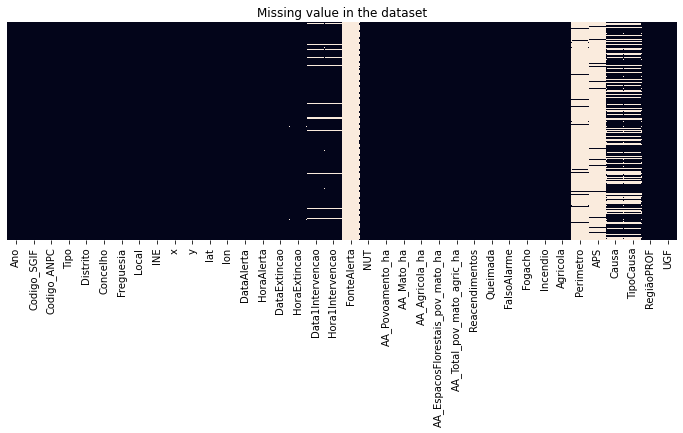

In [74]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='rocket',yticklabels=False)
plt.title('Missing value in the dataset');

In [75]:
# show statistics values for all dataset
df.describe(include='all')

,Ano,Codigo_SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,x,...,FalsoAlarme,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,RegiãoPROF,UGF
count,23175.0,23175,2.317500e+04,23175,23175,23175,23175,23174,23175.000000,23175.000000,...,23175.000000,23175.000000,23175.000000,23175.000000,826,1059,16162.000000,16162,23173,23174
unique,NaN,23175,NaN,4,19,319,3290,17236,NaN,NaN,...,NaN,NaN,NaN,NaN,87,28,NaN,5,11,27
top,NaN,RO215865,NaN,Florestal,Porto,Penafiel,Lordelo,IGREJA,NaN,NaN,...,NaN,NaN,NaN,NaN,Barroso,PENEDA-GERÊS,NaN,Negligente,Entre Douro e Minho,Tâmega
freq,NaN,1,NaN,15464,4444,477,113,50,NaN,NaN,...,NaN,NaN,NaN,NaN,121,200,NaN,5957,9024,3276
mean,2015.0,NaN,2.015105e+12,NaN,NaN,NaN,NaN,NaN,105733.668910,184868.251953,...,0.126214,0.540539,0.143430,0.162934,NaN,NaN,356.427360,NaN,NaN,NaN
std,0.0,NaN,5.314577e+07,NaN,NaN,NaN,NaN,NaN,53162.190467,49472.361288,...,0.332097,0.498365,0.350519,0.369314,NaN,NaN,246.973762,NaN,NaN,NaN
min,2015.0,NaN,2.015010e+12,NaN,NaN,NaN,NaN,NaN,10101.000000,81317.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN
25%,2015.0,NaN,2.015060e+12,NaN,NaN,NaN,NaN,NaN,60206.000000,157090.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,124.000000,NaN,NaN,NaN
50%,2015.0,NaN,2.015120e+12,NaN,NaN,NaN,NaN,NaN,121303.000000,179200.000000,...,0.000000,1.000000,0.000000,0.000000,NaN,NaN,448.000000,NaN,NaN,NaN
75%,2015.0,NaN,2.015140e+12,NaN,NaN,NaN,NaN,NaN,142111.000000,212096.500000,...,0.000000,1.000000,0.000000,0.000000,NaN,NaN,630.000000,NaN,NaN,NaN


In [76]:
# create profilling report
#profile = ProfileReport(df, title="Profiling Report", explorative=True)

In [77]:
# print the report
#profile.to_notebook_iframe()

In [78]:
#profile.to_file("fires_profiling_report.html")

-------------------

## About the dataset

The dataset is based on data from **** [here](https://??????).

We have taken the original data set and processed it to create a clean dataset with the variables of interest , which includes a set of features including:

* `tipo`: the type of fire.
* `Distrito`: District / location of the fire
* `DataALertas`: Date and Time of alert.
* `Data1Intervencao`: Date and time of firsrt intervenction
* `DataExtincao`: Date and time of extinction.
* `areaArdia`: Burned area.
* `Tempo_de_resposta`: Response time .
* `tempo_de_extincao`: Extinct date and time.



In [79]:
# ready dataset
import pandas as pd

# path to Fabio
#df_impact = pd.read_csv(r'C:\MDSE\FCED\Estatistica\data\Lista_Incendios_2015_v4.csv',delimiter=';')

# path to Hugo
df_impact = pd.read_csv(r'C:\PersonalOneDrive\OneDrive\FEUP - MECD\Ano 1 Sem 1\Fundamentos de Ciência e Engenharia dos Dados\Estatistica\Projeto\FeupEstatistica\data\Lista_Incendios_2015_v4.csv', delimiter=';')
df_impact

,Tipo,Distrito,DataAlerta,Data1Intervencao,DataExtincao,areaArdida,Tempo_de_resposta,tempo_de_extinçao
0,Florestal,Viana do Castelo,2015-03-24 17:01:00,2015-03-24 17:10:00,2015-03-24 18:09:00,2.50,0.150000,0.983333
1,Florestal,Porto,2015-03-24 17:10:00,2015-03-24 17:16:00,2015-03-24 18:47:00,1.35,0.100000,1.516667
2,Florestal,Braga,2015-03-24 19:15:00,2015-03-24 19:25:00,2015-03-24 20:00:00,0.26,0.166667,0.583333
3,Falso Alarme,Viana do Castelo,2015-03-24 20:05:00,2015-03-24 20:20:00,2015-03-24 21:30:00,0.00,0.250000,1.166667
4,Agrícola,Viseu,2015-03-24 20:10:00,2015-03-24 20:15:00,2015-03-24 21:00:00,0.05,0.083333,0.750000
...,...,...,...,...,...,...,...,...
23170,Florestal,Braga,2015-08-09 02:10:00,2015-08-09 02:20:00,2015-08-09 03:15:00,0.50,0.166667,0.916667
23171,Florestal,Viseu,2015-08-09 04:40:00,2015-08-09 04:53:00,2015-08-09 09:30:00,2.50,0.216667,4.616667
23172,Falso Alarme,Aveiro,2015-08-09 05:50:00,2015-08-09 05:55:00,2015-08-09 06:40:00,0.00,0.083333,0.750000
23173,Florestal,Porto,2015-08-09 08:20:00,2015-08-09 08:25:00,2015-08-09 10:40:00,0.05,0.083333,2.250000


#### Data frame size and fixtures | data types
The new data set has 23175 rows and 8 columns correponding to the fixtures we have defined.



In [80]:
#dataset size
print(df_impact.shape)

(23175, 8)


In [81]:
# show columns data type
df_impact.dtypes

Tipo                  object
Distrito              object
DataAlerta            object
Data1Intervencao      object
DataExtincao          object
areaArdida           float64
Tempo_de_resposta    float64
tempo_de_extinçao    float64
dtype: object

In [82]:
# Analysis of null - check if in the dataset we have nulls
df_impact.apply(lambda x: sum(x.isnull()), axis=0)

Tipo                    0
Distrito                0
DataAlerta              0
Data1Intervencao     1199
DataExtincao          312
areaArdida              0
Tempo_de_resposta    1199
tempo_de_extinçao    1210
dtype: int64

## Clean and Filter the data

From our analysis, the dat set has a fire type equals to **'Falso Alerta'** which means that in reality there were no fire and for that we decide to remove the data form that fire type.

Since we are studying the impacts of the fires ,  we focus our analysis in the two districts with more area burned. These district were **Guarda** and **Viana do Castelo**

We also removed rows where the **tempo_de_extinçao** was less than zero (< 0 ).




In [83]:
# Removing fires with Tipo equals 'Falso Alarme'
df_impact = df_impact.loc[df_impact['Tipo'] != 'Falso Alarme']

print('Check distinct values:\n',df_impact['Tipo'].unique())
# sum burned area by distrito
k = df_impact.groupby(['Distrito']).sum()['areaArdida'].sort_values(ascending=False)
k



Check distinct values:
 ['Florestal' 'Agrícola' 'Queimada']


Distrito
Guarda              12914.627514
Viana do Castelo     9880.810900
Braga                7178.268200
Viseu                6572.856300
Vila Real            5618.639000
Bragança             5299.582289
Aveiro               3521.479700
Castelo Branco       3113.270920
Santarém             2708.734777
Porto                2545.857800
Beja                 1937.706000
Coimbra              1739.137100
Évora                1568.840300
Lisboa               1079.677320
Leiria               1078.109200
Portalegre            508.082615
Faro                  478.525850
Setúbal               423.767900
Viana Do Castelo      163.620000
Name: areaArdida, dtype: float64

Text(0, 0.5, 'area (ha)')

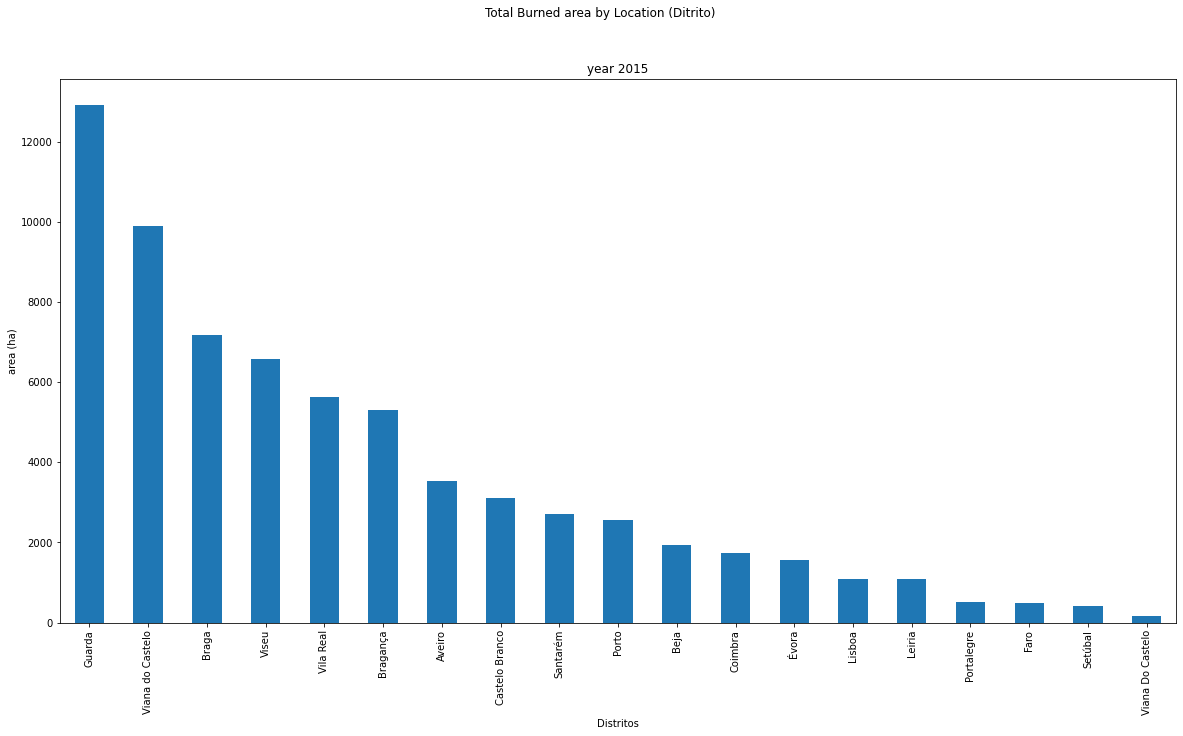

In [84]:
plt.rcParams['figure.figsize'] = [20, 10]

k.plot.bar()
# Add title and axis names
plt.suptitle('Total Burned area by Location (Ditrito)')
plt.title('year 2015')
plt.xlabel('Distritos')
plt.ylabel('area (ha)')

In [85]:
# filter by Distrito of interest and removing
Distrits = ['Guarda','Viana do Castelo']

df_filter = df_impact.loc[df_impact['Distrito'].isin(Distrits)]\
                    .loc[df_impact['tempo_de_extinçao'] > 0]
                    #.loc[df_impact['tempo_de_extinçao'] <= 4000]
df_filter

,Tipo,Distrito,DataAlerta,Data1Intervencao,DataExtincao,areaArdida,Tempo_de_resposta,tempo_de_extinçao
0,Florestal,Viana do Castelo,2015-03-24 17:01:00,2015-03-24 17:10:00,2015-03-24 18:09:00,2.50,0.150000,0.983333
34,Florestal,Guarda,2015-03-04 19:00:00,2015-03-04 19:40:00,2015-03-04 22:35:00,2.00,0.666667,2.916667
35,Queimada,Guarda,2015-03-04 20:44:00,2015-03-04 21:20:00,2015-03-05 00:25:00,0.01,0.600000,3.083333
37,Florestal,Guarda,2015-03-05 18:25:00,2015-03-05 18:35:00,2015-03-05 20:20:00,8.12,0.166667,1.750000
41,Florestal,Viana do Castelo,2015-03-26 00:29:00,2015-03-26 00:32:00,2015-03-26 01:48:00,2.05,0.050000,1.266667
...,...,...,...,...,...,...,...,...
23124,Florestal,Guarda,2015-09-07 13:57:00,2015-09-07 14:05:00,2015-09-07 15:02:00,0.15,0.133333,0.950000
23133,Florestal,Viana do Castelo,2015-09-08 00:06:00,2015-09-08 00:15:00,2015-09-08 01:03:00,0.05,0.150000,0.800000
23136,Florestal,Guarda,2015-09-20 15:33:00,2015-09-20 15:49:00,2015-09-20 18:19:00,36.80,0.266667,2.500000
23143,Florestal,Viana do Castelo,2015-08-07 19:40:00,2015-08-07 19:54:00,2015-08-07 20:45:00,0.10,0.233333,0.850000


In [86]:
# Analysis of null - check if in the dataset we have nulls
df_filter.apply(lambda x: sum(x.isnull()), axis=0)


Tipo                 0
Distrito             0
DataAlerta           0
Data1Intervencao     0
DataExtincao         0
areaArdida           0
Tempo_de_resposta    0
tempo_de_extinçao    0
dtype: int64

In [87]:
# Final data set
df_filter.head()

,Tipo,Distrito,DataAlerta,Data1Intervencao,DataExtincao,areaArdida,Tempo_de_resposta,tempo_de_extinçao
0,Florestal,Viana do Castelo,2015-03-24 17:01:00,2015-03-24 17:10:00,2015-03-24 18:09:00,2.50,0.150000,0.983333
34,Florestal,Guarda,2015-03-04 19:00:00,2015-03-04 19:40:00,2015-03-04 22:35:00,2.00,0.666667,2.916667
35,Queimada,Guarda,2015-03-04 20:44:00,2015-03-04 21:20:00,2015-03-05 00:25:00,0.01,0.600000,3.083333
37,Florestal,Guarda,2015-03-05 18:25:00,2015-03-05 18:35:00,2015-03-05 20:20:00,8.12,0.166667,1.750000
41,Florestal,Viana do Castelo,2015-03-26 00:29:00,2015-03-26 00:32:00,2015-03-26 01:48:00,2.05,0.050000,1.266667


In [88]:
#dataset size
print(df_filter.shape)

(2082, 8)


In terms of occurrences, it seems like there's more occurrences within "Florestal" type specially in "Viana do Castelo" location.

We will focus on fires from **'Tipo' equals to 'Florestal'**

Text(0, 0.5, '# Fire occurrences')

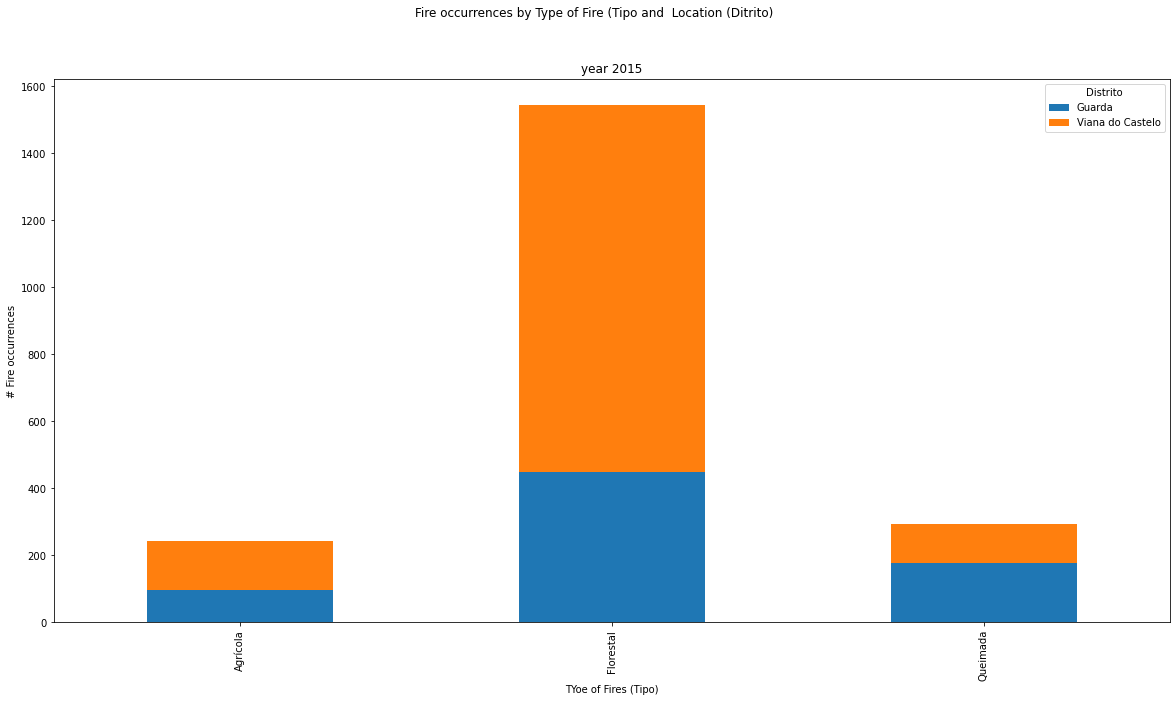

In [89]:
# Total fires ocurrence

k2 = df_filter.groupby(['Tipo', 'Distrito']).size().unstack()

k2.plot(kind='bar', stacked=True)

# Add title and axis names
plt.suptitle('Fire occurrences by Type of Fire (Tipo and  Location (Ditrito)')
plt.title('year 2015')
plt.xlabel('TYoe of Fires (Tipo)')
plt.ylabel('# Fire occurrences')

When looking to the Burned Area, the data shows a more incidence in "FLorestal" type. Probably this could happen becaus the tyoe of terrain, since florestal zones are more likely to burn in big areas

Text(0, 0.5, 'area (ha)')

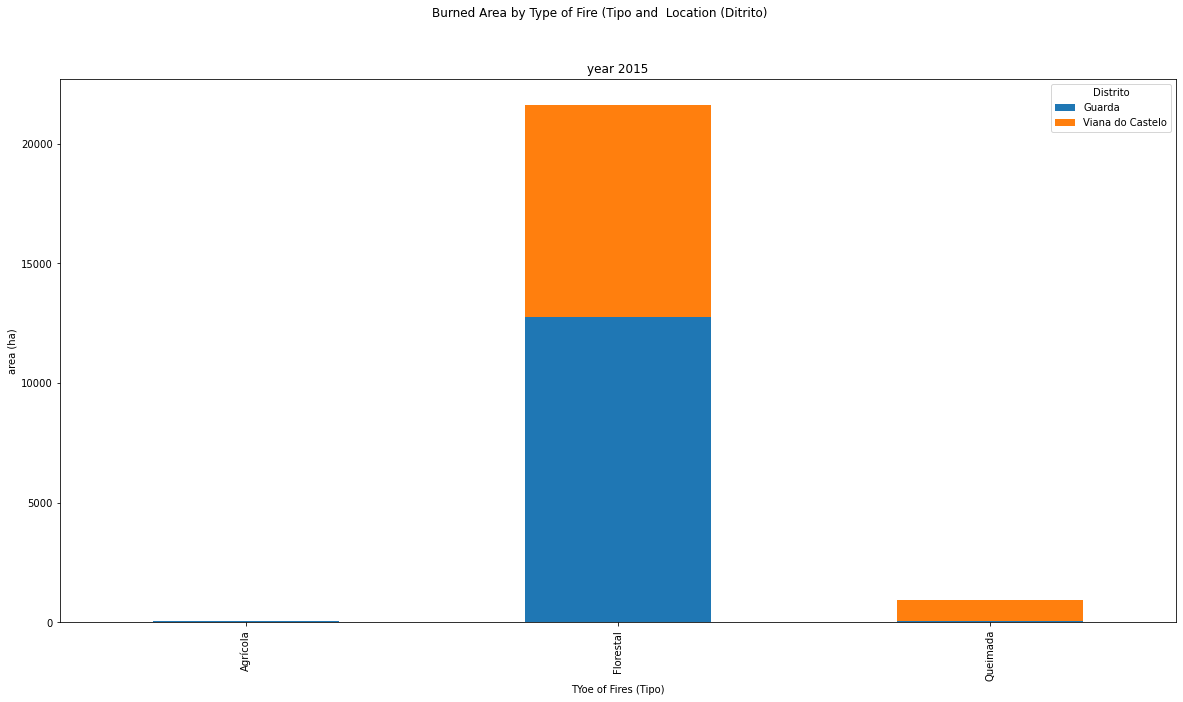

In [90]:
# Total burned area by  ocurrence

k3 = df_filter.groupby(['Tipo', 'Distrito'])['areaArdida'].agg('sum').unstack()

k3.plot(kind='bar', stacked=True)

# Add title and axis names
plt.suptitle('Burned Area by Type of Fire (Tipo and  Location (Ditrito)')
plt.title('year 2015')
plt.xlabel('TYoe of Fires (Tipo)')
plt.ylabel('area (ha)')

In [91]:
# create profilling report
#profile = ProfileReport(df_filter, title="Pandas Profiling Report", explorative=True)

In [92]:
# print the report
#profile.to_notebook_iframe()

In [93]:
# filter the data tio Tipo == 'Florestal'

print(df_filter['Tipo'].unique())

# filter the data tio Tipo == 'Florestal'

df_filter= df_filter.loc[df_filter['Tipo'] == 'Florestal']

# check disticnt values
print(df_filter['Tipo'].unique())


['Florestal' 'Queimada' 'Agrícola']
['Florestal']


In [94]:
# Difine dataset only with numeric columns
df_stats = pd.DataFrame(df_filter, columns = ['areaArdida', 'Tempo_de_resposta','tempo_de_extinçao'])

Looking the statistics of the quantitative variables variables, it seems to be some dispersion in the data and some outliers.
We decide to remove these values apllyng a cl

In [95]:
# show statistics values for dataset numeric columns
df_stats = df_stats.describe().apply(lambda s: s.apply('{0:.2f}'.format))
df_stats

,areaArdida,Tempo_de_resposta,tempo_de_extinçao
count,1545.00,1545.00,1545.00
mean,14.00,0.21,2.90
std,166.40,0.20,7.70
min,0.00,0.00,0.02
25%,0.02,0.08,1.08
50%,0.20,0.18,1.73
75%,1.50,0.27,2.83
max,4673.00,2.87,165.63


array([[<AxesSubplot:title={'center':'areaArdida'}>,
        <AxesSubplot:title={'center':'Tempo_de_resposta'}>],
       [<AxesSubplot:title={'center':'tempo_de_extinçao'}>,
        <AxesSubplot:>]], dtype=object)

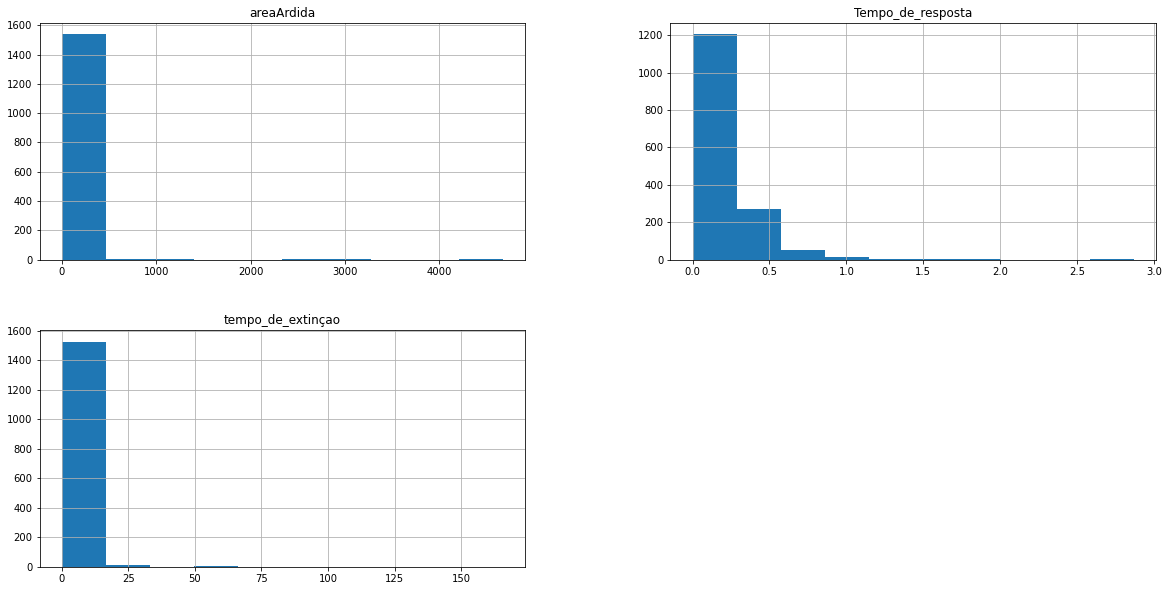

In [96]:

df_stats__data = DataFrame(df_filter, columns = ['Distrito','areaArdida', 'Tempo_de_resposta','tempo_de_extinçao'])
df_stats__data[['areaArdida', 'Tempo_de_resposta','tempo_de_extinçao']].hist()


In [97]:
from scipy import stats
df_stats__data = df_stats__data[(np.abs(stats.zscore(df_stats__data[['areaArdida', 'Tempo_de_resposta','tempo_de_extinçao']])) < 3).all(axis=1)]

#datasets sizes
print(df_filter.shape)

print(df_stats__data.shape)

print('Removed ',df_stats__data.shape[0] - df_filter.shape[0], ' rows' )

(1545, 8)
(1513, 4)
Removed  -32  rows


In [98]:
df_stats = df_stats__data.describe().apply(lambda s: s.apply('{0:.2f}'.format))
df_stats

,areaArdida,Tempo_de_resposta,tempo_de_extinçao
count,1513.00,1513.00,1513.00
mean,3.92,0.20,2.36
std,18.22,0.15,2.32
min,0.00,0.00,0.02
25%,0.02,0.08,1.08
50%,0.20,0.17,1.72
75%,1.50,0.27,2.80
max,272.00,0.80,24.67


**Looking for the quantitativ variaboes in the data set, we have:**

* Response Time ( Tempo_de_resposta) with a median of 0.17 hours (aprox: 10 minutes)
* Burned area ( areaArdida) with a median of 0.10 ha
* time to extinct the fir (tempo_de_extinção) with a median of 1.5 hours



array([[<AxesSubplot:title={'center':'areaArdida'}>,
        <AxesSubplot:title={'center':'Tempo_de_resposta'}>],
       [<AxesSubplot:title={'center':'tempo_de_extinçao'}>,
        <AxesSubplot:>]], dtype=object)

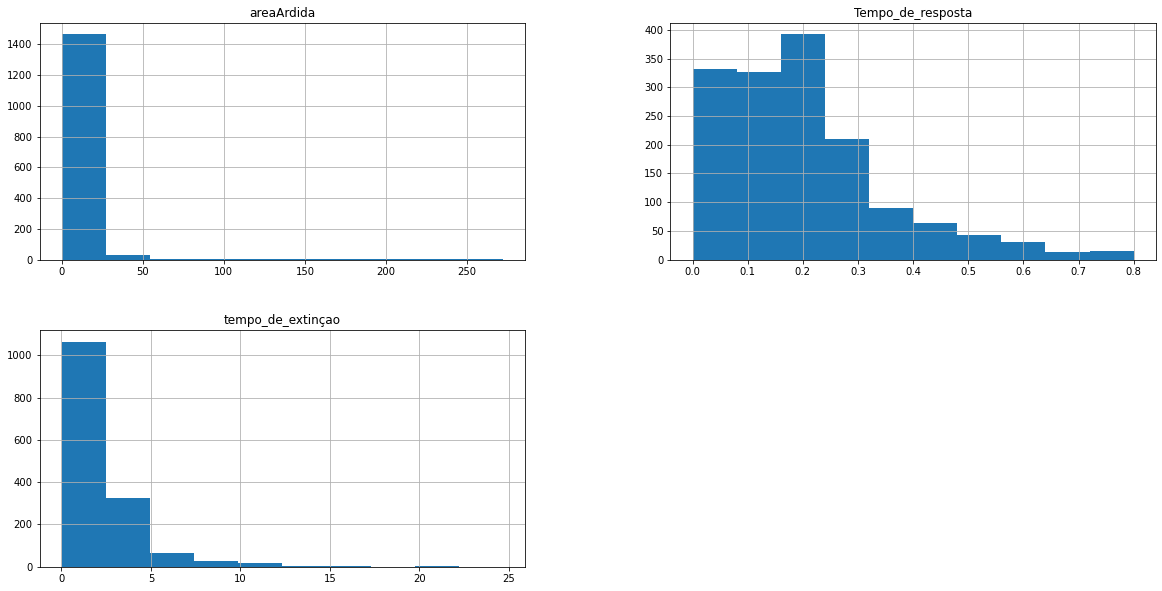

In [99]:
df_stats__data[['areaArdida', 'Tempo_de_resposta','tempo_de_extinçao']].hist()

<AxesSubplot:>

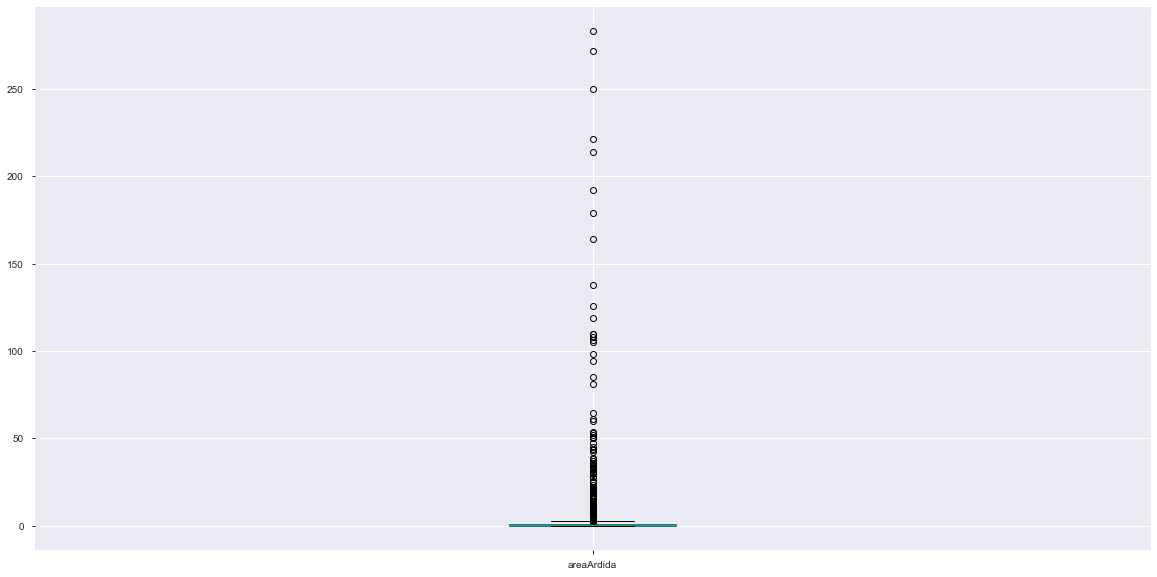

In [409]:
df_stats__data[['areaArdida']].boxplot()

Text(0, 0.5, 'area (ha)')

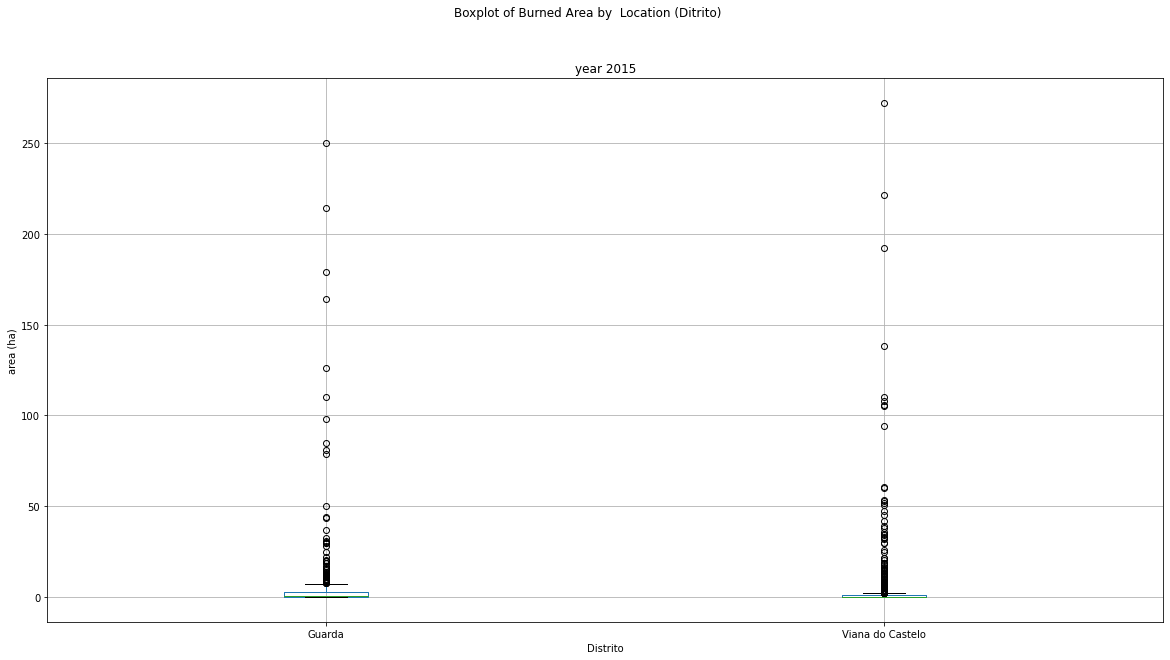

In [115]:

df_stats__data.pivot(columns='Distrito',values='areaArdida').boxplot()
# Add title and axis names
plt.suptitle('Boxplot of Burned Area by  Location (Ditrito)')
plt.title('year 2015')
plt.xlabel('Distrito')
plt.ylabel('area (ha)')

For burned area we have:
* Guarda with a mean burned area by fire of 6.06 ha
* Viana do Castelo with a mean burned area of 3.05

It looks that Guarda ha mor burned area by fire than Viana do Castelo although Viana do Castelo seemms to have more fire incidences

In [127]:

# group by stats for burned area group by distrito
#df_stats__data
df_stats__data.groupby(by="Distrito")['areaArdida'].describe()


,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Guarda,436.0,6.068574,23.014143,0.00005,0.05,0.50,3.0,250.0
Viana do Castelo,1077.0,3.052255,15.799523,0.00010,0.02,0.12,1.0,272.0


For Response Time (RT) we have:
* Guarda with a mean RT of 0.22 hours --> apprx. 13 minutes
* Viana do Castelo with a mean RT of 0.19 hours --> apprx. 11 minutes

Aside the previous results, it seems like theres no significant difference in RT in both locations
Also the variance seems to be diferent in both


In [128]:
 #group by stats for burned area group by distrito

df_stats__data.groupby(by="Distrito")['Tempo_de_resposta'].describe()

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Guarda,436.0,0.221063,0.160679,0.0,0.100000,0.200000,0.300000,0.783333
Viana do Castelo,1077.0,0.191071,0.151611,0.0,0.083333,0.166667,0.266667,0.800000


For the extinction time (ET) we have:
* Guarda with a mean ET of 2.46 hours
* Viana do Castelo with a mean ET of 2.31 hours

Aside the previous results, it seems like theres no significant difference in ET in both locations


In [130]:
df_stats__data.groupby(by="Distrito")['tempo_de_extinçao'].describe()

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Guarda,436.0,2.468196,2.431109,0.166667,1.083333,1.891667,2.833333,24.666667
Viana do Castelo,1077.0,2.315258,2.273200,0.016667,1.083333,1.666667,2.733333,22.000000


## Inference

As we are interested in understanding the impact of the fires, we want to find if there's significant differences between the Burned Ares of the two locations and if theres some relation between the amount of Burned Area and the Response Time to the fires.

Question 1:
- Is the mean Burned Area per fire significantly different in the two locations? Remeber the means: Guarda = 6.06 and Viana do Castelo = 3.05 ha

Question 2:
- Is there a relation between the Burned Area and the time to Response that causes more or less impact?



Question 1:
- Is the mean Burned Area per fire significantly different in the two locations? Remeber the means: Guarda = 6.06 and Viana do Castelo = 3.05 ha

**Conduct a two sample t-test.**
we need to decide if we’ll assume the two populations have equal variances or not.
As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1.

2.11 < 4 This means we can assume that the population variances are equal.
Thus, we can proceed to perform the two sample t-test with equal variances


In [1]:
import numpy as np

group1 = df_stats__data[df_stats__data['Distrito']=='Guarda']['areaArdida']
group2 = df_stats__data[df_stats__data['Distrito']=='Viana do Castelo']['areaArdida']

print('Guarda variance: ',np.var(group1))
print('Guarda variance: ',np.var(group2))

print('variance ratio: ',
    max(np.var(group1), np.var(group2)) / min(np.var(group1), np.var(group2)))


NameError: name 'df_stats__data' is not defined

2.11 < 4 This means we can assume that the population variances are equal.
Thus, we can proceed to perform the two sample t-test with equal variances

In [155]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=group1, b=group2, equal_var=True)


Ttest_indResult(statistic=2.924106465118234, pvalue=0.003505939195406723)

The t test statistic is 2.924 and the corresponding two-sided p-value is 0.003.

The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.003) is less than alpha = 0.05, we  reject the null hypothesis of the test.

Acepting the alternative hypothesis says that the two population means are not equal or, the mean Burned area from this two locations are not equal

Question 2:
- Is there a relation between the Burned Area and the time to Response that causes more or less impact?


Independence test for continuous variables

In general, Pearson correlation ρ does not represent the independence or dependence, but a linear relationship between two random variables. If we assume that paired two random variables are either independent or just linearly related, then Pearson correlation ρ can be used to measure independency.

The covariance and covariance matrix are used widely within statistics and multivariate analysis to characterize the relationships between two or more variables.


C:\Users\hugo.nogueira\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


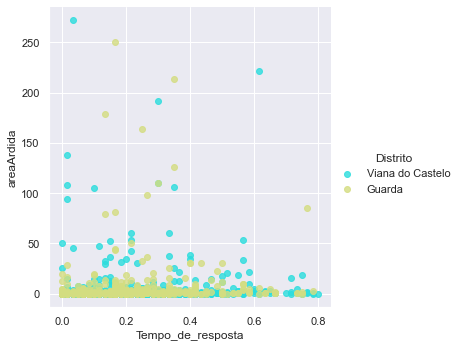

In [166]:
#analyze relationship between two variables
facet = sns.lmplot(data=df_stats__data, x='Tempo_de_resposta', y='areaArdida',hue='Distrito', palette='rainbow',
                   fit_reg=False, legend=True, legend_out=True)

In [160]:
from numpy.random import randn
from numpy.random import seed
from numpy import cov

data1 = df_stats__data['areaArdida']
data2 = df_stats__data['Tempo_de_resposta']

# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[3.31890341e+02 1.85247199e-01]
 [1.85247199e-01 2.39700090e-02]]


The covariance between the two variables is almost 0 (1.85247199e-01) suggesting the variables are independent as we expect.

In [164]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.066


We can see that the two variables are not correlated ( value appr. 0) and that the correlation is 0.066.
This suggests a no level of correlation


<AxesSubplot:>

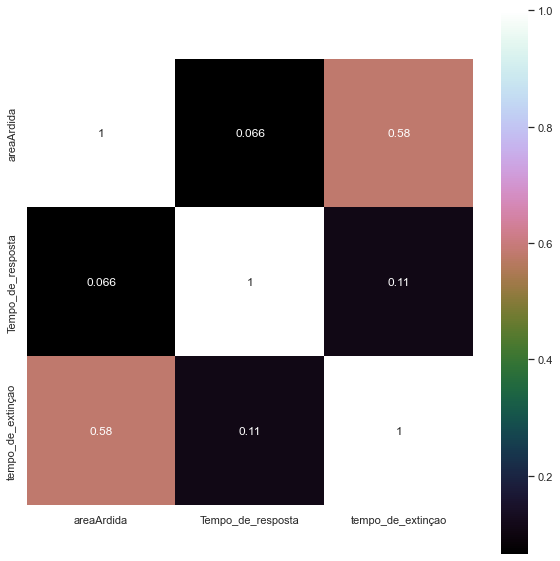

In [156]:
# Correlation heatmap
#sns.set(rc={'figure.figsize':(20,10)})
#correlation = df_stats__data.corr()
#plt.figure(figsize=(10, 10))
#sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

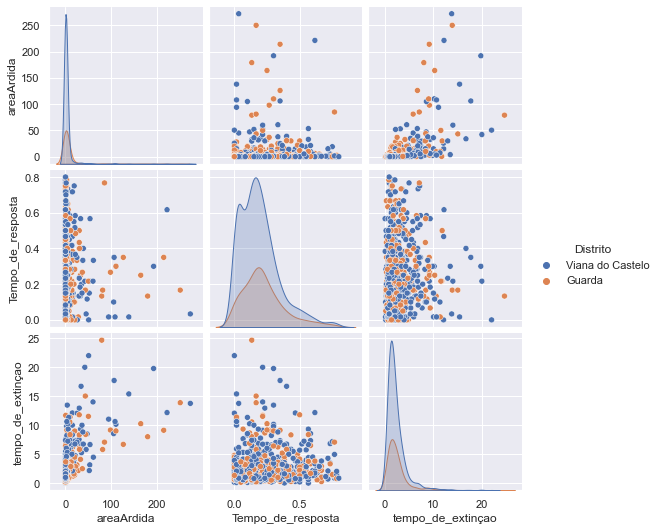

In [167]:
# Pairwise plots
pplot = sns.pairplot(df_stats__data, hue="Distrito") # data frame with no outliers
